# Weekly Activity

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from utils import display_image, display_images

if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

In [24]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


## 1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.
- Use external libraries imutils.
- Modify the transformation matrix.

In [25]:
import cv2
import imutils
import numpy as np
from IPython.display import Image

image = cv2.imread('images/chessboard.png')

rotated = imutils.rotate_bound(image, angle = 45)

cv2.imshow('Rotated Image with imutils', rotated)
cv2.imwrite('images/chessboard_imutils_rotate_45.png', rotated) 

#no lena.jfif in this weeks images

rows, cols = image.shape[:2]

# Define the rotation angle (clockwise)
angle = 45
angle_rad = np.deg2rad(angle)

# Calculate the new image dimensions after rotation
new_width = int(cols * np.abs(np.cos(angle_rad)) + rows * np.abs(np.sin(angle_rad)))
new_height = int(rows * np.abs(np.cos(angle_rad)) + cols * np.abs(np.sin(angle_rad)))

# Compute the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)

# Adjust the translation component of the matrix to avoid cropping
rotation_matrix[0, 2] += (new_width - cols) / 2
rotation_matrix[1, 2] += (new_height - rows) / 2

# Perform the rotation
rotated = cv2.warpAffine(image, rotation_matrix, (new_width, new_height), borderValue=(255, 255, 255))

# Display the rotated image
cv2.imshow('Rotated Image with numpy', rotated)
cv2.imwrite('images/chessboard_imutils_45.png', image) 
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2. Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are cv.bitwise_and(), cv.bitwise_or() and cv.bitwise_not(). You need to use cv.threshold function to segment the flower. Please refer to online documentation for more info. The result should resemble the following:
bee and flowers

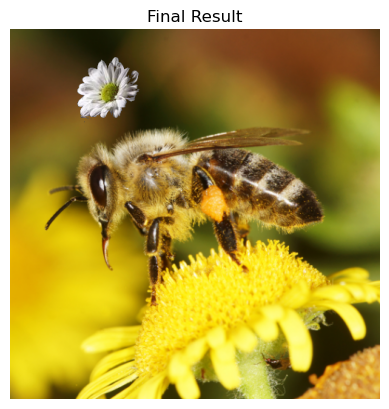

In [26]:
# Read the images
flower = cv.imread("images/flower.jfif", cv.IMREAD_UNCHANGED)
bee = cv.imread("images/native-bee.png", cv.IMREAD_UNCHANGED)

flower_gray = cv.cvtColor(flower, cv.COLOR_BGR2GRAY)

# Automatic find the best thershold * not the best result
# blur = cv.GaussianBlur(flower_gray,(5,5),0)
# _, mask = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

#Best result
_, mask = cv.threshold(flower_gray, 70, 255, cv.THRESH_BINARY)

# Create an inverted mask
mask_inv = cv.bitwise_not(mask)

# Define the coordinates where you want to place the flower image on the bee image
top_left_x = 0  # X coordinate of the top-left corner
top_left_y = 0  # Y coordinate of the top-left corner

# Get the height and width of the flower image
flower_height, flower_width = flower.shape[:2]

# Get the region of interest (ROI) on the bee image where the flower will be placed
roi = bee[top_left_y:top_left_y + flower_height, top_left_x:top_left_x + flower_width].copy()

# Apply the mask to the flower and background regions
flower_fg = cv.bitwise_and(flower[..., :3], flower[..., :3], mask=mask)
bee_bg = cv.bitwise_and(roi[..., :3], roi[..., :3], mask=mask_inv)

# Ensure both images have the same number of channels (if not already ensured)
if bee_bg.shape[2] != flower_fg.shape[2]:
    bee_bg = cv.cvtColor(bee_bg, cv.COLOR_BGR2BGRA)

# Combine the flower and bee regions
result_roi = cv.add(bee_bg, flower_fg)
result_roi_bgra = cv.cvtColor(result_roi, cv.COLOR_BGR2BGRA)
# Copy the combined region back into the original bee image
bee[top_left_y:top_left_y + flower_height, top_left_x:top_left_x + flower_width] = result_roi_bgra

# Display each step's output
display_image("Final result", bee)
plt.imshow(cv.cvtColor(bee, cv.COLOR_BGR2RGB))
plt.title("Final Result")
plt.axis('off')
plt.show()

## 3. Write a function that randomly crop the central region of an image. The method signature should be as shown in the following:
random_center_crop(image, min_crop_ratio, max_crop_ratio)

In [39]:
def random_center_crop(image, min_crop_ratio, max_crop_ratio):
    """
    Randomly crop the central region of an image.

    Parameters:
    - image: Input image (numpy array).
    - min_crop_ratio: Minimum ratio for cropping (0.0 to 1.0).
    - max_crop_ratio: Maximum ratio for cropping (0.0 to 1.0).

    Returns:
    - Cropped image (numpy array).
    """
    if min_crop_ratio < 0.0 or min_crop_ratio > 1.0:
        raise ValueError("min_crop_ratio should be between 0.0 and 1.0")
    if max_crop_ratio < 0.0 or max_crop_ratio > 1.0:
        raise ValueError("max_crop_ratio should be between 0.0 and 1.0")
    if min_crop_ratio > max_crop_ratio:
        raise ValueError("min_crop_ratio should not be greater than max_crop_ratio")

    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate crop sizes based on ratios
    min_crop_size = int(min(height, width) * min_crop_ratio)
    max_crop_size = int(min(height, width) * max_crop_ratio)

    # Randomly select crop size
    crop_size = np.random.randint(min_crop_size, max_crop_size + 1)

    # Calculate crop region
    start_x = max(0, (width - crop_size) // 2)
    start_y = max(0, (height - crop_size) // 2)
    end_x = start_x + crop_size
    end_y = start_y + crop_size

    # Perform crop
    cropped_image = image[start_y:end_y, start_x:end_x]

    return cropped_image

img1 = random_center_crop(cv.imread("images\lena.jfif"), 0.1, 0.5)
display_image("result",img1)

## 4. Aside from Gaussian noise, name another common type of noise. Write the code to demonstrate how the noise can be included in an image.

In [42]:
# salt and pepper noise

def add_salt_and_pepper_noise(image, salt_ratio=0.01, pepper_ratio=0.01):

    noisy_image = np.copy(image)

    # Add salt noise
    num_salt = np.ceil(image.size * salt_ratio)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 255

    # Add pepper noise
    num_pepper = np.ceil(image.size * pepper_ratio)
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 0

    return noisy_image

image = cv.imread('images\lena.jfif')
noisy_image = add_salt_and_pepper_noise(image, salt_ratio=0.01, pepper_ratio=0.01)

cv.imshow('Salt and Pepper Noisy Image', noisy_image)
cv.waitKey(0)
cv.destroyAllWindows()